In [ ]:
# install relevant libraries and uploading the dataset
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

# Load the heart disease data from the uploaded CSV file
df = pd.read_csv('Heartdiseasedata.csv')



Saving Heartdiseasedata.csv to Heartdiseasedata (4).csv


In [ ]:
# Display the first few rows of the dataset
df.head()

# ETL
def clean_data(df):
    # Check for missing values and handle them
    df.fillna(method='ffill', inplace=True)

    # Convert categorical vals to numerical
    if 'sex' in df.columns:
        df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})


    columns_to_scale = ['age']
    for col in ['chol', 'trestbps']:
        if col in df.columns:
            columns_to_scale.append(col)

    if columns_to_scale:
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    return df

# Cleaning
cleaned_data = clean_data(df)




<ipython-input-7-7101889b2d53>:7: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



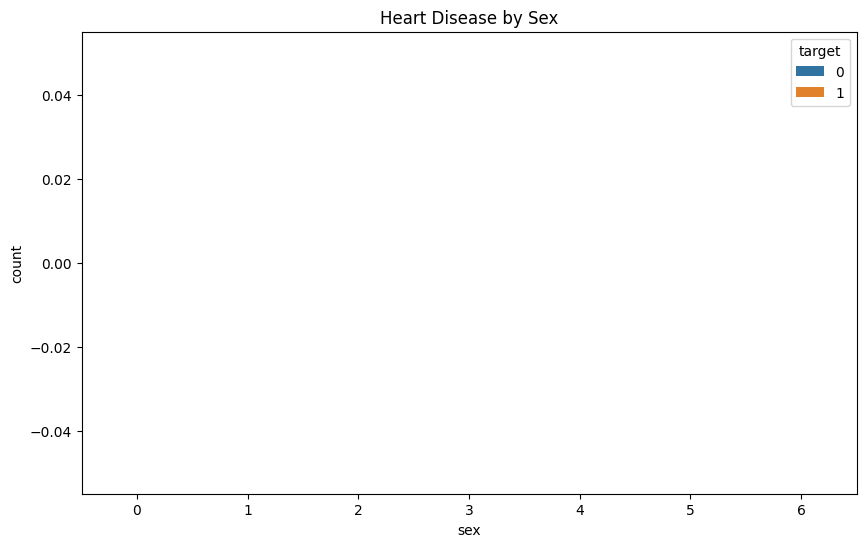

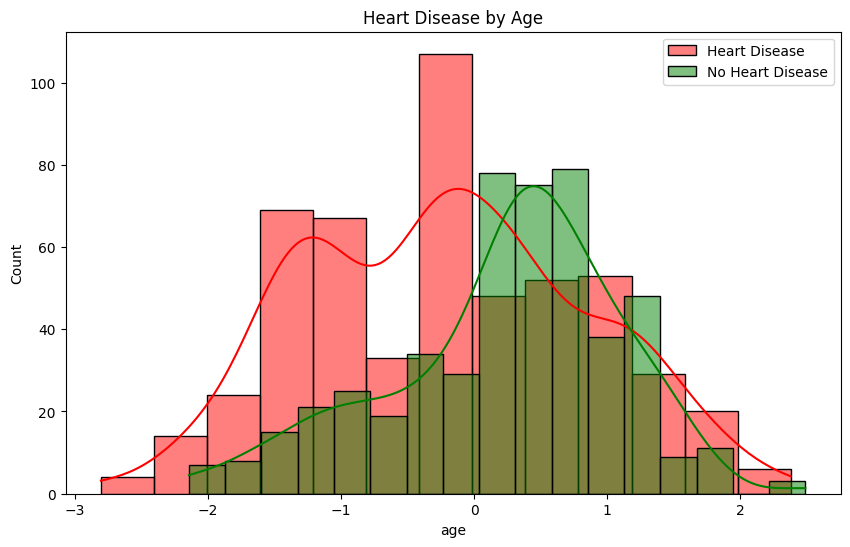

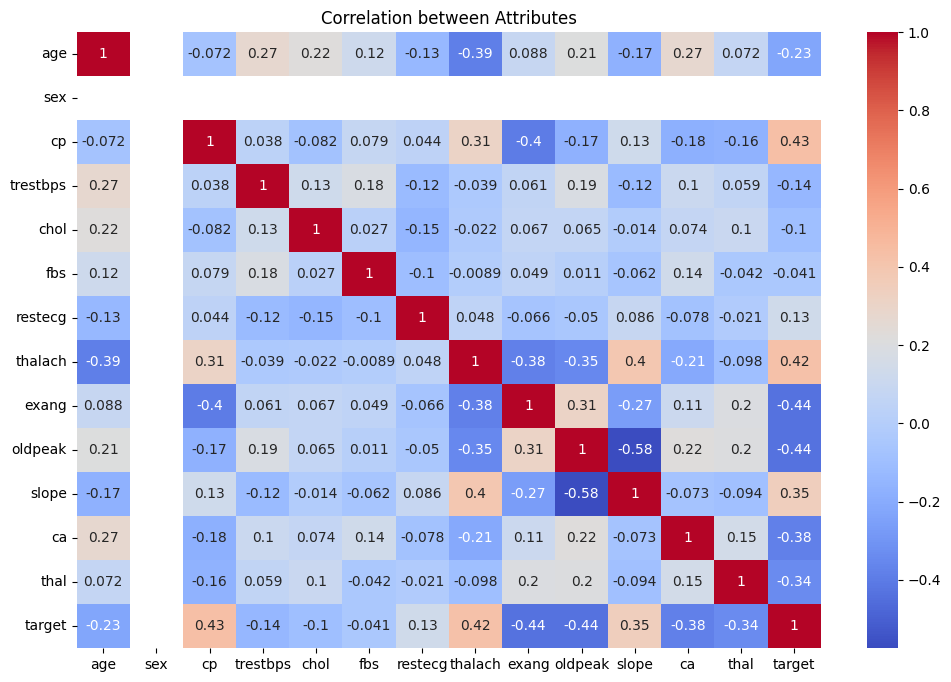

In [ ]:
# Exploratory Data Analysis (EDA)
def visualize_data(df):
    # Heart disease rates by sex
    plt.figure(figsize=(10, 6))
    sns.countplot(x='sex', hue='target', data=df)
    plt.title('Heart Disease by Sex')
    plt.show()

    # Heart disease rates by age
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['target'] == 1]['age'], kde=True, color='red', label='Heart Disease')
    sns.histplot(df[df['target'] == 0]['age'], kde=True, color='green', label='No Heart Disease')
    plt.title('Heart Disease by Age')
    plt.legend()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation between Attributes')
    plt.show()

# Visualize
visualize_data(cleaned_data)

# Dashboard
import plotly.express as px

# Interactive plot example: Age vs Cholesterol
fig = px.scatter(cleaned_data, x='age', y='chol', color='target', title='Age vs Cholesterol')
fig.show()

